In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

# Set GD limit
limit = 3

# Set CSV paths
teams_csv = 'data/2025/mens_champ_teams.csv'
scores_csv = 'data/2025/2025-06-29_mens_champ_results.csv'

In [2]:
teams_df = pd.read_csv(teams_csv)
teams_df

,Club ID,Club
0,175734,THE BOROUGH FC MEN
1,175326,GUELPH UNITED MEN
2,175331,HAMILTON UNITED MEN
3,175387,MASTER'S FA MEN
4,175391,NORTH MISSISSAUGA SC MEN
5,175414,PICKERING FC MEN
6,176208,SUDBURY CYCLONES MEN
7,175408,UNIONVILLE MILLIKEN SC MEN
8,183406,WATERLOO UNITED MEN
9,183408,WHITBY FC MEN


In [3]:
scores_df = pd.read_csv(scores_csv)
season_name = scores_df['Name'].iloc[0]
scores_df


,Match ID,home_result,away_result,Home team,Away team,Name,Match date (EDT)
0,261900659,0,1,183189,176208,League1 Ontario Championship Division (M) 2025,2025-04-18 19:00:00
1,261900660,0,3,175405,175408,League1 Ontario Championship Division (M) 2025,2025-04-18 19:30:00
2,261900661,1,1,183408,175734,League1 Ontario Championship Division (M) 2025,2025-04-18 20:00:00
3,261900662,3,0,175391,175331,League1 Ontario Championship Division (M) 2025,2025-04-18 20:30:00
4,261900663,1,0,175387,183406,League1 Ontario Championship Division (M) 2025,2025-04-20 18:00:00
...,...,...,...,...,...,...,...
66,261900727,1,0,183189,175387,League1 Ontario Championship Division (M) 2025,2025-06-27 19:00:00
67,261900728,1,0,175405,175391,League1 Ontario Championship Division (M) 2025,2025-06-27 19:30:00
68,261900729,4,0,183408,175414,League1 Ontario Championship Division (M) 2025,2025-06-27 20:00:00
69,261900730,0,0,175734,176208,League1 Ontario Championship Division (M) 2025,2025-06-28 18:00:00


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
261900659                   0                  0                    0                0                         0                 0                     1                           0                    0              0                    0                       -1
261900660                   0                  0                    0                0                         0                 0                     0                           1                    0              0                   -1                        0
261900661                  -1                  0                    0                0                         0                 0                     0                           0                    0          

In [6]:
print(X_df.T.to_string())

                            261900659  261900660  261900661  261900662  261900663  261900664  261900665  261900666  261900667  261900668  261900669  261900670  261900671  261900672  261900673  261900674  261900675  261900676  261900677  261900678  261900680  261900681  261900682  261900683  261900684  261900685  261900686  261900687  261900688  261900689  261900690  261900691  261900692  261900693  261900694  261900695  261900696  261900697  261900698  261900699  261900700  261900702  261900703  261900704  261900705  261900706  261900707  261900708  261900709  261900710  261900711  261900712  261900713  261900714  261900715  261900716  261900717  261900718  261900719  261900720  261900721  261900722  261900723  261900724  261900725  261900726  261900727  261900728  261900729  261900730  261900744
THE BOROUGH FC MEN                  0          0         -1          0          0          0          0          1          0          0          0          0          0          0          0 

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                            THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
THE BOROUGH FC MEN                          12                  0                   -1               -1                        -2                 0                    -2                          -2                   -1             -1                   -1                       -1
GUELPH UNITED MEN                            0                 10                   -1               -2                        -1                -1                    -1                           0                    0             -1                   -1                       -2
HAMILTON UNITED MEN                         -1                 -1                   12               -2                        -1                -1             

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                            THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
THE BOROUGH FC MEN                          12                  0                   -1               -1                        -2                 0                    -2                          -2                   -1             -1                   -1                       -1
GUELPH UNITED MEN                            0                 10                   -1               -2                        -1                -1                    -1                           0                    0             -1                   -1                       -2
HAMILTON UNITED MEN                         -1                 -1                   12               -2                        -1                -1             

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
p_bar_df_sorted = p_bar_df.sort_values(by=['GD'], ascending=False)
print(p_bar_df_sorted.to_string())

                            GD
THE BOROUGH FC MEN          11
WHITBY FC MEN                8
WATERLOO UNITED MEN          6
SUDBURY CYCLONES MEN         5
GUELPH UNITED MEN            4
MASTER'S FA MEN              3
YORK UNITED ACADEMY MEN      0
NORTH MISSISSAUGA SC MEN    -1
PICKERING FC MEN            -2
UNIONVILLE MILLIKEN SC MEN  -3
WINDSOR CITY FC MEN         -6
HAMILTON UNITED MEN        -25


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
p_bar_bw_df_sorted = p_bar_bw_df.sort_values(by=['GD with limited blowouts'], ascending=False)
print(p_bar_bw_df_sorted.to_string())

                            GD with limited blowouts
THE BOROUGH FC MEN                                 8
SUDBURY CYCLONES MEN                               7
WHITBY FC MEN                                      5
GUELPH UNITED MEN                                  4
MASTER'S FA MEN                                    3
WATERLOO UNITED MEN                                2
YORK UNITED ACADEMY MEN                            0
NORTH MISSISSAUGA SC MEN                           0
UNIONVILLE MILLIKEN SC MEN                         0
PICKERING FC MEN                                  -2
WINDSOR CITY FC MEN                               -6
HAMILTON UNITED MEN                              -21


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                            massey_rating
THE BOROUGH FC MEN               0.869762
WHITBY FC MEN                    0.647840
SUDBURY CYCLONES MEN             0.523313
WATERLOO UNITED MEN              0.377538
GUELPH UNITED MEN                0.282926
MASTER'S FA MEN                  0.162302
YORK UNITED ACADEMY MEN          0.126944
UNIONVILLE MILLIKEN SC MEN      -0.070234
NORTH MISSISSAUGA SC MEN        -0.085008
PICKERING FC MEN                -0.221760
WINDSOR CITY FC MEN             -0.675731
HAMILTON UNITED MEN             -1.937892


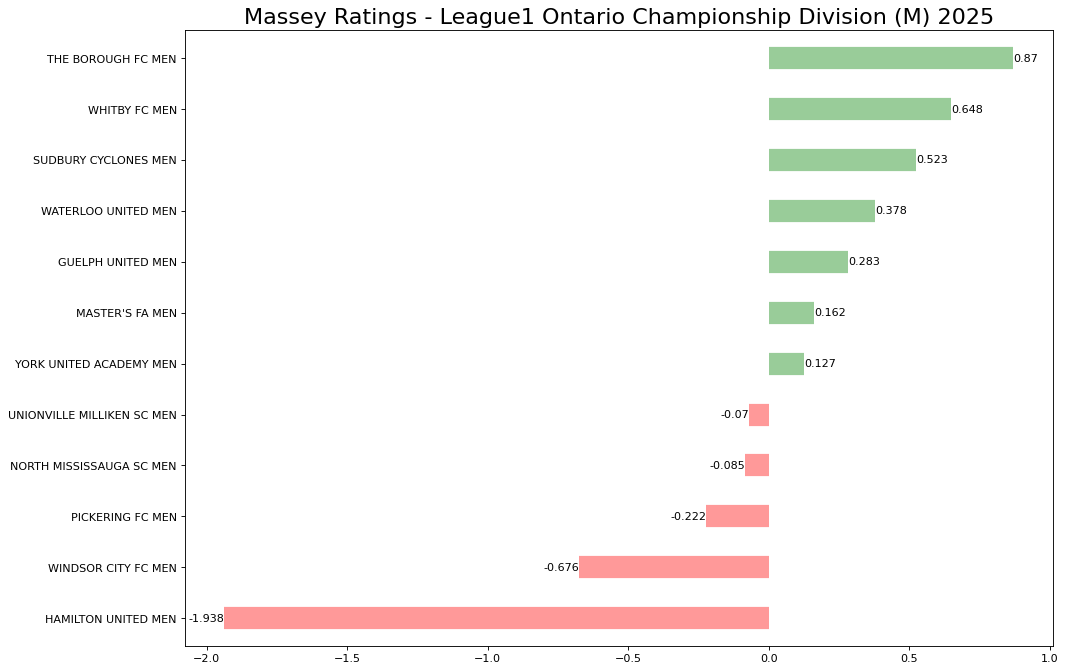

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                            massey_rating
THE BOROUGH FC MEN               0.662814
SUDBURY CYCLONES MEN             0.609182
WHITBY FC MEN                    0.417409
GUELPH UNITED MEN                0.310292
MASTER'S FA MEN                  0.158182
YORK UNITED ACADEMY MEN          0.131534
UNIONVILLE MILLIKEN SC MEN       0.108184
WATERLOO UNITED MEN              0.105505
NORTH MISSISSAUGA SC MEN        -0.002839
PICKERING FC MEN                -0.212352
WINDSOR CITY FC MEN             -0.626199
HAMILTON UNITED MEN             -1.661710


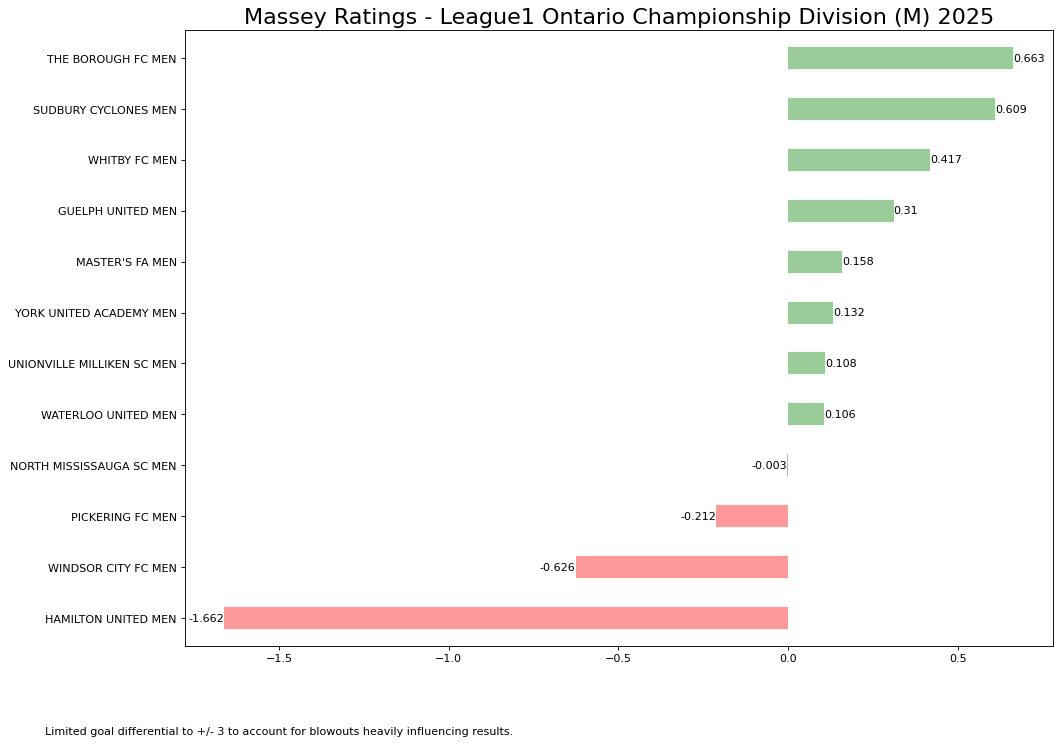

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})
plt.figtext(s=f'Limited goal differential to +/- {str(limit)} to account for blowouts heavily influencing results.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()